In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('data/clean_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
X = df.drop(columns=['Price'],axis=1)

In [6]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [7]:
y = df['Price']

In [8]:
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1297     33992.6400
1298     79866.7200
1299     12201.1200
1300     40705.9200
1301     19660.3200
Name: Price, Length: 1302, dtype: float64

In [9]:
# Create Column Transformer with 3 types of transformers
#cat_features = ['Company','TypeName','Cpu brand','Gpu brand','os']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#numeric_transformer = StandardScaler()
#oh_transformer = OneHotEncoder()

# preprocessor = ColumnTransformer(
#     [
#         ("OneHotEncoder", oh_transformer, cat_features)
#     ]
# )


preprocessor = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

In [10]:
X = preprocessor.fit_transform(X)

c:\Apurva\STUDY\Data science\PricePrediction\py38_pricePredictor\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

X_train.shape,X_test.shape

((1106, 38), (196, 38))

#### Create an Evaluate Function to give all metrics after model Training

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.001),
    "Ridge": Ridge(alpha=10),
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=3),
    "Decision Tree": DecisionTreeRegressor(max_depth=8),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15),
    "XGBRegressor": XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

c:\Apurva\STUDY\Data science\PricePrediction\py38_pricePredictor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e+10, tolerance: 1.518e+08
  model = cd_fast.enet_coordinate_descent(


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 17402.5204
- Mean Absolute Error: 12310.2726
- R2 Score: 0.7793
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 18656.0020
- Mean Absolute Error: 12829.3721
- R2 Score: 0.7618


Lasso
Model performance for Training set
- Root Mean Squared Error: 17402.5204
- Mean Absolute Error: 12310.2698
- R2 Score: 0.7793
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 18655.9930
- Mean Absolute Error: 12829.3670
- R2 Score: 0.7618


Ridge
Model performance for Training set
- Root Mean Squared Error: 17802.9657
- Mean Absolute Error: 12576.1534
- R2 Score: 0.7690
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 19335.1839
- Mean Absolute Error: 13101.2331
- R2 Score: 0.7442


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 14220.7779
- Mean Absolute Erro

#### Results

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.863109
6,XGBRegressor,0.838907
5,Random Forest Regressor,0.801893
4,Decision Tree,0.783283
1,Lasso,0.761815
0,Linear Regression,0.761815
2,Ridge,0.744157
8,AdaBoost Regressor,0.700579
3,K-Neighbors Regressor,0.587636


#### Linear Regression

In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 76.18


#### Plot y_pred and y_test

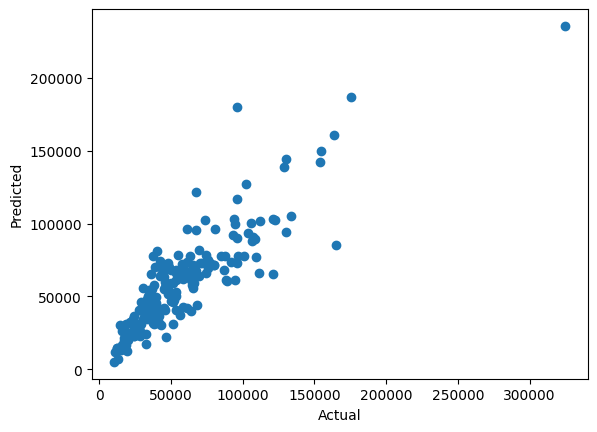

In [16]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

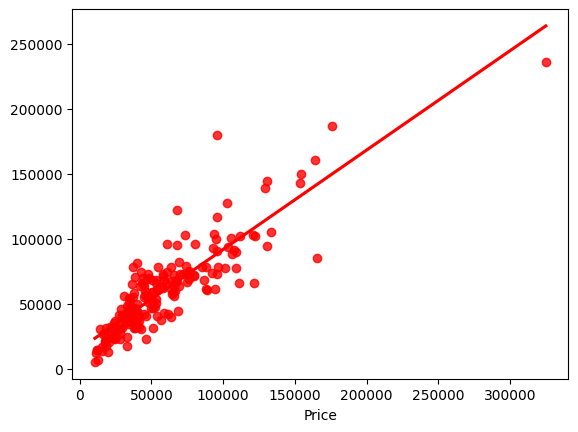

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');